In [1]:
!pip install seaborn --upgrade

    100% |████████████████████████████████| 215kB 26.6MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


# Lecture 21: Storing and analyzing data

Despite the central place of data in scientific work, we often don't think much about how to properly organize or store it. Today we'll discuss the organizing principles of [tidy data](https://vita.had.co.nz/papers/tidy-data.pdf), an increasingly common approach to organizing data that makes it easy to understand and to analyze.

For our examples below, we'll use the Python library `pandas`, which [stores data](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html) in a structure called a `DataFrame`. As we'll see below, it's very easy to manipulate data in this format.

### Example: Examining the `iris` dataset from `seaborn`

As a first test, let's load a precompiled dataset called `iris` from the `seaborn` package, which we've used extensively for plotting. This dataset is stored in a "tidy" format. We'll start by just looking at the rough properties of the data.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

df = sns.load_dataset("iris")
df.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [2]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [3]:
len(df)

150

### Showing the relationships between variables

As we can see from the column names, `iris` describes measurements from different species of iris flowers. We can look more closely to see how different variables are related. For example, what is the relationship between the length of the petals and sepals?

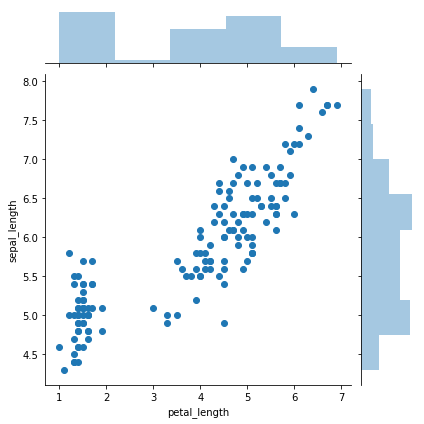

In [4]:
sns.jointplot('petal_length', 'sepal_length', data=df)

### Selecting out subsets

In the plot above, all species were included together. What happens if we look at just a single species -- is the relationship different? We can explore this by using `pandas` to selection out a subset of the data that corresponds to just a single species and repeating the plot.

In [5]:
print(np.unique(df.species))

['setosa' 'versicolor' 'virginica']


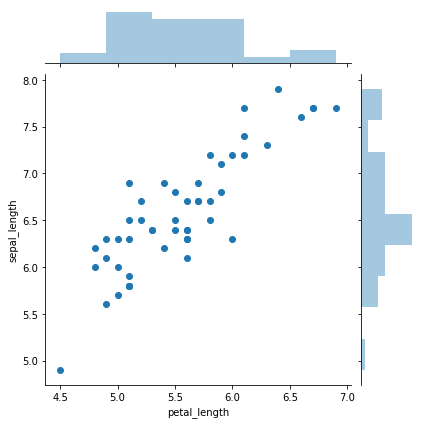

In [8]:
df_setosa     = df[df.species=='setosa']
df_versicolor = df[df.species=='versicolor']
df_virginica  = df[df.species=='virginica']

sns.jointplot('petal_length', 'sepal_length', data=df_virginica)

### Visualizing many variables at once

We can also use `seaborn` to show how many variables in the data are related to one another. What other questions might you ask about this data? Because the data is stored in a simple format, it's easy to quickly analyze the data using `pandas`.

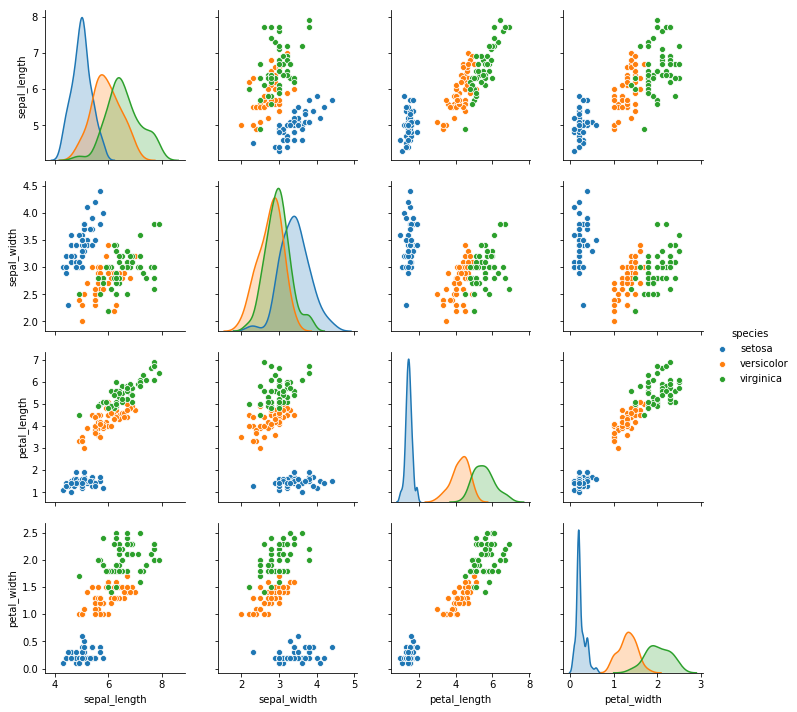

In [9]:
sns.pairplot(df, hue="species")

### A quick test on another dataset

The `planets` dataset contains information about recently discovered planets. We can use this to explore, for example, how the distance of the planet is related to the year in which it was discovered, or how methods of discovery have changed over time. See [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html) for some more examples.

In [10]:
df = sns.load_dataset("planets")
df.head(10)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008
6,Radial Velocity,1,1773.400,4.64,18.15,2002
7,Radial Velocity,1,798.500,NaN,21.41,1996
8,Radial Velocity,1,993.300,10.30,73.10,2008
9,Radial Velocity,2,452.800,1.99,74.79,2010


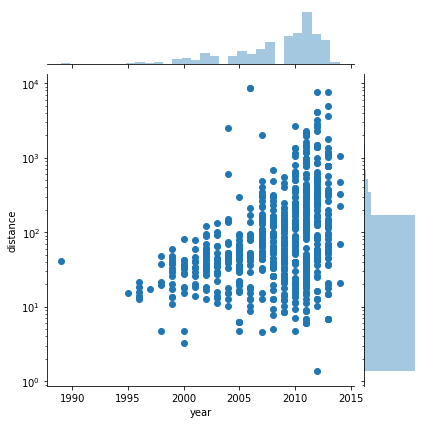

In [11]:
sns.jointplot('year', 'distance', data=df)
plot.yscale('log')

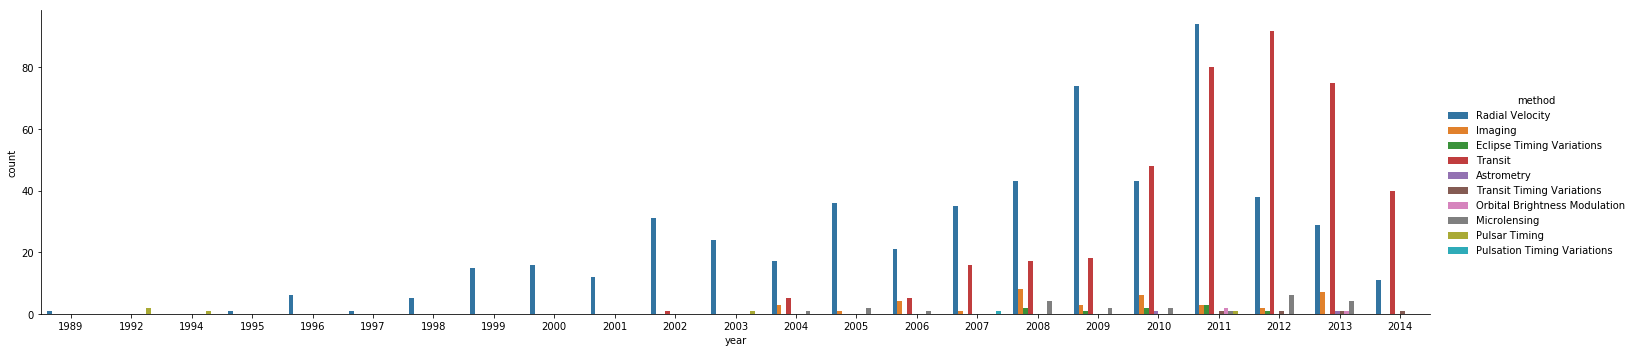

In [12]:
sns.catplot('year', kind='count', aspect=4, data=df, hue='method')

### Example: Tidying the TB dataset

Earlier, we saw an example of a dataset about rates of tuberculosis in different countries that was very hard to interpret and to work with. Here, we'll use `pandas` to load the data set and clean it for analysis. This exercise follows the description [here](http://www.jeannicholashould.com/tidy-data-in-python.html).

FYI: `iso2` refers to the [two-digit country code](https://www.nationsonline.org/oneworld/country_code_list.htm) for different countries. This dataset was collected by the [WHO](https://www.who.int/).

In [18]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/hadley/tidy-data/master/data/tb.csv')
df.head(10)

,iso2,year,new_sp,new_sp_m04,new_sp_m514,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,...,new_sp_f04,new_sp_f514,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,new_sp_fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AD,1994,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AD,1996,8.0,NaN,NaN,0.0,0.0,0.0,4.0,1.0,...,NaN,NaN,0.0,1.0,1.0,0.0,0.0,1.0,0.0,NaN
7,AD,1997,17.0,NaN,NaN,0.0,0.0,1.0,2.0,2.0,...,NaN,NaN,0.0,1.0,2.0,3.0,0.0,0.0,1.0,NaN
8,AD,1998,1.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AD,1999,4.0,NaN,NaN,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN


In [19]:
# A first step: 'melting' the dataset to extract the sex and age range
# In this process all column names except for 'iso2' and 'year' are stored as 'sex_and_age'
# All values are stored as 'cases'

df = pd.melt(df, id_vars=["iso2", "year"], value_name="cases", var_name="sex_and_age")
df.head(10)

,iso2,year,sex_and_age,cases
0,AD,1989,new_sp,NaN
1,AD,1990,new_sp,NaN
2,AD,1991,new_sp,NaN
3,AD,1992,new_sp,NaN
4,AD,1993,new_sp,15.0
5,AD,1994,new_sp,24.0
6,AD,1996,new_sp,8.0
7,AD,1997,new_sp,17.0
8,AD,1998,new_sp,1.0
9,AD,1999,new_sp,4.0


In [20]:
# Parse the column names to extract sex, age upper and lower bounds
tmp_df = df["sex_and_age"].str.extract("(\D)(\d+)(\d{2})")    

# Add new columns for these variables
tmp_df.columns = ["sex", "age_lower", "age_upper"]

# Create a single `age` column using `age_lower` and `age_upper`
tmp_df["age"] = tmp_df["age_lower"] + "-" + tmp_df["age_upper"]

# Merge the data frames together
df = pd.concat([df, tmp_df], axis=1)

df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


,iso2,year,sex_and_age,cases,sex,age_lower,age_upper,age
0,AD,1989,new_sp,NaN,NaN,NaN,NaN,NaN
1,AD,1990,new_sp,NaN,NaN,NaN,NaN,NaN
2,AD,1991,new_sp,NaN,NaN,NaN,NaN,NaN
3,AD,1992,new_sp,NaN,NaN,NaN,NaN,NaN
4,AD,1993,new_sp,15.0,NaN,NaN,NaN,NaN


In [21]:
# Drop unnecessary columns and rows
df = df.drop(['sex_and_age',"age_lower","age_upper"], axis=1)
df = df.dropna()

# Rename `iso2` to `country`
df = df.rename(index=str, columns={'iso2': 'country'})

# Sort the data frame
df_fixed = df.sort_values(["country", "year", "sex", "age"], ascending=True)
df_fixed.head(100)

,country,year,cases,sex,age
75003,AD,1996,0.0,f,0-14
80772,AD,1996,1.0,f,15-24
86541,AD,1996,1.0,f,25-34
92310,AD,1996,0.0,f,35-44
98079,AD,1996,0.0,f,45-54
103848,AD,1996,1.0,f,55-64
17313,AD,1996,0.0,m,0-14
23082,AD,1996,0.0,m,15-24
28851,AD,1996,0.0,m,25-34
34620,AD,1996,4.0,m,35-44


In [22]:
len(df_fixed)























29448

### Examining the dataset

Now, it is much easier for us to analyze the data. For example, we can check: how many cases of tuberculosis were there in the US among men? How do the number of cases vary over time?

In [25]:
df_US= df_fixed[(df_fixed.country=='AF') & (df_fixed.sex=='m')]
df_US.head(20)

,country,year,cases,sex,age
17364,AF,1997,0.0,m,0-14
23133,AF,1997,10.0,m,15-24
28902,AF,1997,6.0,m,25-34
34671,AF,1997,3.0,m,35-44
40440,AF,1997,5.0,m,45-54
46209,AF,1997,2.0,m,55-64
17365,AF,1998,30.0,m,0-14
23134,AF,1998,129.0,m,15-24
28903,AF,1998,128.0,m,25-34
34672,AF,1998,90.0,m,35-44


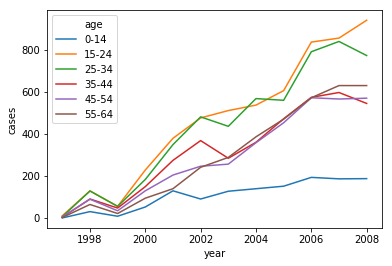

In [26]:
sns.lineplot(x='year', y='cases', data=df_US, hue='age')